This was one of the data challenges from Driven Data. The goal was to determine whether a blood donor donated blood in March 2007 based off of some data points shown below. I did a logistic regression model, which ended up not working too well, I think because the correlations of data weren't so high to begin with.


In [294]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import matplotlib.pyplot # for plotting in general

blood_data = pd.read_csv('../desktop/transfusion.csv', sep=',') # https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/
names = blood_data.columns

In [295]:
blood_data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [296]:
### Correlation Matrix
blood_data.corr()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
Recency (months),1.000000,-0.182745,-0.182745,0.160618,-0.279869
Frequency (times),-0.182745,1.000000,1.000000,0.634940,0.218633
Monetary (c.c. blood),-0.182745,1.000000,1.000000,0.634940,0.218633
Time (months),0.160618,0.634940,0.634940,1.000000,-0.035854
whether he/she donated blood in March 2007,-0.279869,0.218633,0.218633,-0.035854,1.000000


In [297]:
blood_data.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [298]:
# The first thing I did with the data was split it into lists of train/test and inputs/types for a 
# logistic regression model.

data_inputs = blood_data.drop(['Frequency (times)'], axis=1)
    # I dropped Frequency(times) too because it had a direct correlation with Monetary (c.c blood)

total_num = 748
train_per = 0.92
train_num = int(total_data*train_per)

train_data = data_inputs.sample(n=train_num)
test_data = data_inputs.drop(train_data.index)

test_yes = test_data[test_data['whether he/she donated blood in March 2007']==1]
test_no = test_data[test_data['whether he/she donated blood in March 2007']==0]

train_inputs = []
train_types = []
test_yes_inputs = []
test_no_inputs = []

for train_data, row in train_data.iterrows():
    train_inputs.append((row['Recency (months)'], row['Monetary (c.c. blood)'], row['Time (months)']))
    train_types.append(row['whether he/she donated blood in March 2007'])

for test_yes, row in test_yes.iterrows():
    test_yes_inputs.append((row['Recency (months)'], row['Monetary (c.c. blood)'], row['Time (months)']))
    
for test_no, row in test_no.iterrows():
    test_no_inputs.append((row['Recency (months)'], row['Monetary (c.c. blood)'], row['Time (months)']))
    
print(test_yes_inputs)
print(test_no_inputs)


[(1, 4000, 35), (2, 2000, 28), (2, 3000, 47), (4, 500, 4), (4, 1250, 33), (4, 1000, 26), (11, 3500, 73), (2, 750, 38), (11, 250, 11), (16, 1250, 40), (4, 500, 51), (21, 500, 21), (4, 4000, 70), (4, 250, 4), (7, 2250, 89), (17, 1750, 58), (23, 250, 23)]
[(4, 500, 4), (3, 4250, 86), (2, 1250, 26), (4, 2750, 61), (2, 2750, 88), (2, 500, 11), (4, 750, 16), (4, 3000, 88), (4, 1750, 52), (4, 1500, 47), (9, 2250, 45), (4, 250, 4), (11, 3000, 58), (3, 500, 23), (11, 2000, 46), (4, 1250, 58), (11, 1250, 33), (4, 500, 23), (2, 750, 52), (11, 250, 11), (11, 250, 11), (11, 1000, 58), (16, 2000, 76), (16, 750, 34), (16, 250, 16), (14, 500, 35), (14, 750, 52), (11, 750, 76), (21, 250, 21), (11, 500, 70), (23, 750, 41), (23, 750, 89), (2, 2750, 28), (12, 2750, 39), (6, 750, 26), (14, 1750, 35), (14, 250, 14), (16, 250, 16), (16, 1250, 71), (21, 750, 35), (23, 750, 35), (23, 250, 23), (23, 250, 23)]


In [299]:
# TRAINING LOGISTIC REGRESSION MODEL

model = linear_model.LogisticRegression()
model.fit(train_inputs, train_types)

print('Intercept: {0}  Coefficients: {1}'.format(model.intercept_, model.coef_))

Intercept: [-0.3090249]  Coefficients: [[-0.11444894  0.0005514  -0.02550928]]


# Results
This model ended up not working too well as shown in the predictions below... I'm guessing this is probably because the correlations with the columns and the classification weren't too high to begin with.

In [300]:
# MAKING PREDICTIONS
print('Type predictions: {0}'.format(model.predict(test_yes_inputs)))
print('Probabilities: {0}'.format(model.predict_proba(test_yes_inputs)))

Type predictions: [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Probabilities: [[0.29125598 0.70874402]
 [0.53727754 0.46272246]
 [0.52065475 0.47934525]
 [0.64408963 0.35591037]
 [0.71491573 0.28508427]
 [0.70654535 0.29345465]
 [0.8176116  0.1823884 ]
 [0.74908292 0.25091708]
 [0.84692912 0.15307088]
 [0.92210749 0.07789251]
 [0.85718395 0.14281605]
 [0.95131381 0.04868619]
 [0.58586071 0.41413929]
 [0.67502651 0.32497349]
 [0.89471635 0.10528365]
 [0.94099131 0.05900869]
 [0.96739731 0.03260269]]


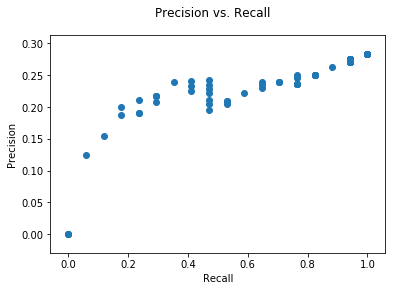

In [301]:
## PRECISION/RECALL CURVE

thresholds = []
for i in range(1, 100):
    thresholds.append(i/100)
    
precision = []
recall = []
    
for threshold in thresholds:
    TP = 0
    FP = 0
    FN = 0
    yes_prob = model.predict_proba(test_yes_inputs)
    no_prob = model.predict_proba(test_no_inputs)
    for i in yes_prob:
        if i[0] > threshold:
            TP += 1
        elif i[0] < threshold:
            FN += 1
    for l in no_prob:
        if l[0] > threshold:
            FP += 1            
    p = TP/(TP+FP)
    r = TP/(TP+FN)
    precision.append(p)
    recall.append(r)

fig = matplotlib.pyplot.figure(1)
fig.suptitle('Precision vs. Recall')
matplotlib.pyplot.xlabel('Recall')
matplotlib.pyplot.ylabel('Precision')

matplotlib.pyplot.scatter(recall, precision)